# Prediction Using Supervised ML

##### Importing All the Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Data Reading

In [2]:
#Load Dataset
data="http://bit.ly/w-data"
df=pd.read_csv(data)

In [3]:
#Displaying The dataset
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


##### As you can see, the dataset has only 2 columns-hours and scores
##### The dataset shows the scores of students based on the hours they study


## Data Visualization

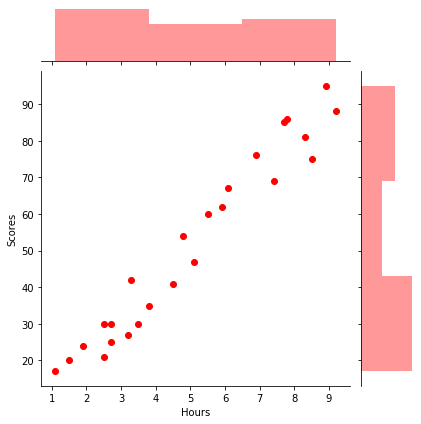

In [12]:
sns.jointplot(x='Hours',y='Scores',data=df,color='red',kind='scatter')

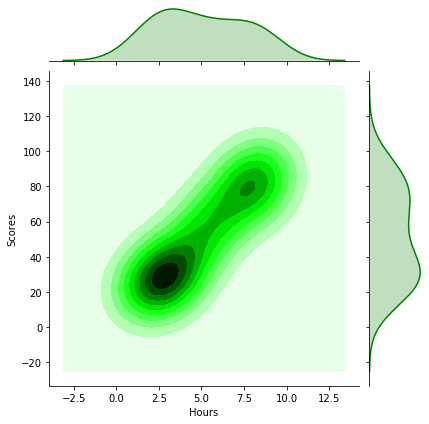

In [15]:
#We can change the kind to different parameters such as hex,kde etc..
sns.jointplot(x='Hours',y='Scores',data=df,color='green',kind='kde')

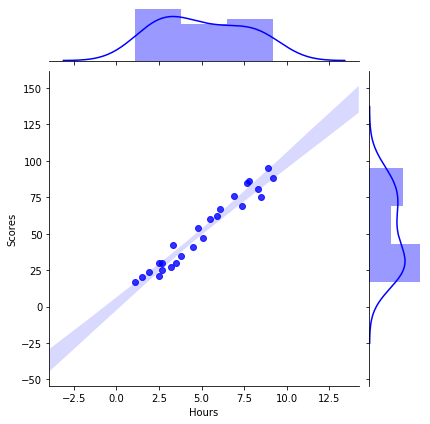

In [17]:
sns.jointplot(x='Hours',y='Scores',data=df,color='blue',kind='reg')

## Model Building

In [20]:
X=df.drop('Scores',axis=1)
y=df['Scores']

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score,ShuffleSplit

In [28]:
lm=LinearRegression()

In [29]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [34]:
cv=ShuffleSplit(n_splits=5)
score=cross_val_score(lm,X,y,cv=cv)#Cross validation or K-Fold reduces the Overfitting

In [36]:
score

array([0.94358561, 0.92201793, 0.76788588, 0.9252907 , 0.94723434])

In [37]:
score.mean()

0.9012028930542177

C:\Users\ASUS\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


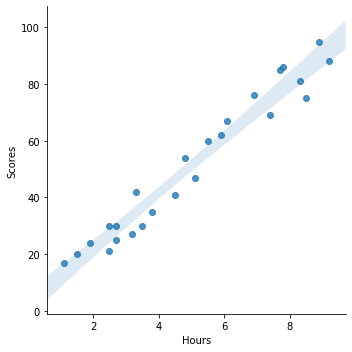

In [94]:
sns.lmplot(x='Hours',y='Scores',data=df)#linear model Plot

In [38]:
lm.coef_

array([9.68207815])

In [39]:
lm.intercept_

2.826892353899737

In [43]:
#Evaluating The Test and Training Score
print('The Coffecient of Determination on test data is {}'.format(lm.score(X_test,y_test)))

The Coffecient of Determination on test data is 0.9678055545167994


In [44]:
print('The Coffecient of Determination on training data is {}'.format(lm.score(X_train,y_train)))

The Coffecient of Determination on training data is 0.9491209376364417


In [45]:
y_pred=lm.predict(X_test)

In [46]:
y_pred

array([83.18814104, 27.03208774, 27.03208774, 69.63323162, 59.95115347])

In [65]:
df2=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})

In [66]:
df2

,Actual,Predicted
8,81,83.188141
16,30,27.032088
0,21,27.032088
23,76,69.633232
11,62,59.951153


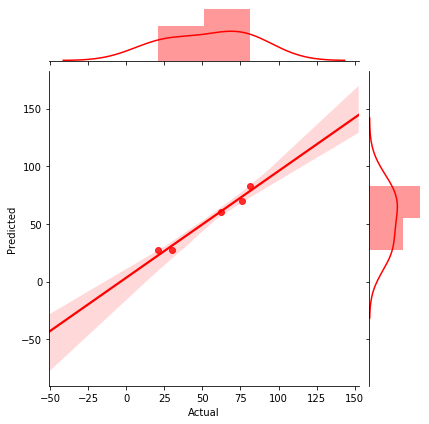

In [69]:
sns.jointplot(x='Actual',y='Predicted',data=df2,color='red',kind='reg')

## Predicting The Score

In [76]:
hours=np.array([9.25])
hours=hours.reshape(1,-1)

In [79]:
print('The Score in percentage after Studying 9.25 hours is {}'.format(lm.predict(hours)[0]))

The Score in percentage after Studying 9.25 hours is 92.38611528261494


## Model Evaluation

In [80]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [81]:
print('Mean Squared Error is {}'.format(mean_squared_error(y_test,y_pred)))

Mean Squared Error is 18.943211722315272


In [84]:
print('Mean Absolute Error is {}'.format(mean_absolute_error(y_test,y_pred)))

Mean Absolute Error is 3.9207511902099244


In [85]:
print('Root Mean Squared Error is {}'.format(np.sqrt(mean_squared_error(y_test,y_pred))))

Root Mean Squared Error is 4.352380006653288
